In [0]:
%pip install eli5
%pip install h2o==3.32.1.1
%pip install shap
%pip install xgboost
%pip install hyperopt
%pip install pdpbox
%pip install mlflow
%pip install faker
%pip install /dbfs/FileStore/jars/c330e75c_b248_48a4_a6f0_01ffd076d1ab/maas_utils-0.1.5-py3-none-any.whl

Python interpreter will be restarted.
Collecting eli5
 Using cached eli5-0.11.0-py2.py3-none-any.whl (106 kB)
Requirement already satisfied: jinja2 in /databricks/python3/lib/python3.7/site-packages (from eli5) (2.11.3)
Collecting attrs>16.0.0
 Using cached attrs-20.3.0-py2.py3-none-any.whl (49 kB)
Collecting graphviz
 Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.7/site-packages (from eli5) (1.4.1)
Requirement already satisfied: scikit-learn>=0.20 in /databricks/python3/lib/python3.7/site-packages (from eli5) (0.22.1)
Requirement already satisfied: six in /databricks/python3/lib/python3.7/site-packages (from eli5) (1.14.0)
Requirement already satisfied: tabulate>=0.7.7 in /databricks/python3/lib/python3.7/site-packages (from eli5) (0.8.9)
Requirement already satisfied: numpy>=1.9.0 in /databricks/python3/lib/python3.7/site-packages (from eli5) (1.18.1)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn>=0.20->eli5) (0.14.1)
Requirement already satisfied: MarkupSafe>=0.23 in /databricks/python3/lib/python3.7/site-packages (from jinja2->eli5) (1.1.1)
Installing collected packages: graphviz, attrs, eli5
Successfully installed attrs-20.3.0 eli5-0.11.0 graphviz-0.16
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting h2o==3.32.1.1
 Using cached h2o-3.32.1.1-py2.py3-none-any.whl
Requirement already satisfied: colorama>=0.3.8 in /databricks/python3/lib/python3.7/site-packages (from h2o==3.32.1.1) (0.4.4)
Requirement already satisfied: future in /databricks/python3/lib/python3.7/site-packages (from h2o==3.32.1.1) (0.18.2)
Requirement already satisfied: requests in /databricks/python3/lib/python3.7/site-packages (from h2o==3.32.1.1) (2.22.0)
Requirement already satisfied: tabulate in /databricks/python3/lib/python3.7/site-packages (from h2o==3.32.1.1) (0.8.9)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.7/site-packages (from requests->h2o==3.32.1.1) (2020.6.20)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/python3/lib/python3.7/site-packages (from requests->h2o==3.32.1.1) (2.8)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.7/site-packages (from requests->h2o==3.32.1.1) (1.25.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /usr/lib/python3/dist-packages (from requests->h2o==3.32.1.1) (3.0.4)
Installing collected packages: h2o
 Attempting uninstall: h2o
 Found existing installation: h2o 3.32.1.2
 Not uninstalling h2o at /databricks/python3/lib/python3.7/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-158e5f0a-5ca3-4f50-882f-69ca7d2c88ed
 Can't uninstall 'h2o'. No files were found to uninstall.
Successfully installed h2o-3.32.1.1
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: shap in /databricks/python3/lib/python3.7/site-packages (0.39.0)
Requirement already satisfied: slicer==0.0.7 in /databricks/python3/lib/python3.7/site-packages (from shap) (0.0.7)
Requirement already satisfied: tqdm>4.25.0 in /databricks/python3/lib/python3.7/site-packages (from shap) (4.60.0)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.7/site-packages (from shap) (0.25.3)
Requirement already satisfied: numba in /databricks/python3/lib/python3.7/site-packages (from shap) (0.53.1)
Requirement already satisfied: scikit-learn in /databricks/python3/lib/python3.7/site-packages (from shap) (0.22.1)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.7/site-packages (from shap) (1.4.1)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.7/site-packages (from shap) (1.18.1)
Requirement already satisfied: cloudpickle in /databricks/python3/lib/python3.7/site-packages (from shap) (1.6.0)
Requirement already satisfied:

In [0]:
from mass_utils import pyspark_helpers as pysh
from mass_utils import databricks_helpers as dbh
from datetime import datetime as dt
import math
from pyspark.sql.functions import regexp_replace, col
import pandas as pd
import numpy as np
import seaborn as sns
#importing my libraries
# from pysparkling.ml import H2OAutoML
from pyspark.ml import Pipeline
from pyspark.ml.feature import SQLTransformer
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OXGBoostEstimator
import pyspark.sql.functions as f
from h2o.automl import H2OAutoML
import eli5
from eli5.sklearn import PermutationImportance
from eli5.permutation_importance import get_score_importances
import shap
import random
import mlflow

/databricks/python/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
 warnings.warn(message, FutureWarning)

In [0]:
print("arrow enabled?", spark.conf.get("spark.sql.execution.arrow.enabled"))
print("arrow batch size ?", spark.conf.get("spark.sql.execution.arrow.maxRecordsPerBatch"))
spark.conf.set("spark.sql.execution.arrow.enabled", "True")
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "4096")# Enable Arrow support.
spark.conf.set("spark.sql.execution.arrow.fallback.enabled", "true")# Enable Arrow support.
spark.conf.set("spark.sql.files.maxPartitionBytes", "16777216")

arrow enabled? true
arrow batch size ? 10000

In [0]:
import h2o
from h2o.automl import H2OAutoML
import mlflow
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.
-------------------------- ------------------------------------------------------------------
H2O_cluster_uptime: 3 hours 0 mins
H2O_cluster_timezone: Etc/UTC
H2O_data_parsing_timezone: UTC
H2O_cluster_version: 3.32.1.1
H2O_cluster_version_age: 1 month and 9 days
H2O_cluster_name: H2O_from_python_root_5yff8m
H2O_cluster_total_nodes: 1
H2O_cluster_free_memory: 23.68 Gb
H2O_cluster_total_cores: 95
H2O_cluster_allowed_cores: 95
H2O_cluster_status: locked, healthy
H2O_connection_url: http://localhost:54321
H2O_connection_proxy: {"http": null, "https": null}
H2O_internal_security: False
H2O_API_Extensions: Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version: 3.7.5 final
-------------------------- ------------------------------------------------------------------

In [0]:
model_path = '/dbfs/segmentation/seg_spend_prospect_current_square_root_model_final/XGBoost_model_python_1620189067683_12'
saved_model = h2o.load_model(model_path)
loaded_model = saved_model

In [0]:
loaded_model.model_performance

Out[5]: Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_model_python_1620189067683_12


Model Summary: 
 number_of_trees
-- -----------------
 467


ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 5246.398612409806
RMSE: 72.4320275320925
MAE: 36.733156848411625
RMSLE: NaN
Mean Residual Deviance: 5246.398612409806

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 15006.904831676915
RMSE: 122.50267275319716
MAE: 52.99421686654753
RMSLE: NaN
Mean Residual Deviance: 15006.904831676915

Cross-Validation Metrics Summary: 
 mean sd cv_1_valid cv_2_valid cv_3_valid cv_4_valid cv_5_valid
---------------------- -------- --------- ------------ ------------ ------------ ------------ ------------
mae 52.9918 0.654746 52.8261 52.8624 54.0776 52.2973 52.8957
mean_residual_deviance 15005.7 473 15067.5 14967.6 15736.1 14818.3 14439.1
mse 15005.7 473 15067.5 14967.6 15736.1 14818.3 14439.1
r2 0.266809 0.0308132 0.264471 0.312392 0.259198 0.271592 0.22639
residual_deviance 15005.7 473 15067.5 14967.6 15736.1 14818.3 14439.1
rmse 122.486 1.92392 122.75 122.342 125.444 121.73 120.163
rmsle nan 0 nan nan nan nan nan

Scoring History: 
 timestamp duration number_of_trees training_rmse training_mae training_deviance
--- ------------------- ---------------- ----------------- ------------------ ------------------ -------------------
 2021-05-05 06:19:11 1 min 42.110 sec 0.0 149.4674020734948 43.65580366878122 22340.504282599763
 2021-05-05 06:19:11 1 min 42.286 sec 1.0 140.76906090411717 44.07860653388316 19815.92850782705
 2021-05-05 06:19:12 1 min 42.387 sec 2.0 133.85087695763102 44.47873974569898 17916.057262326878
 2021-05-05 06:19:12 1 min 42.476 sec 3.0 128.5460894772641 44.921361031199176 16524.09711989679
 2021-05-05 06:19:12 1 min 42.578 sec 4.0 124.31353774253877 45.33238251332282 15453.85566606561
--- --- --- --- --- --- ---
 2021-05-05 06:19:27 1 min 58.227 sec 265.0 84.02318821065553 41.736914673960584 7059.896157083243
 2021-05-05 06:19:31 2 min 2.249 sec 330.0 80.1011982249702 40.02576103255309 6416.20195707597
 2021-05-05 06:19:35 2 min 6.276 sec 392.0 76.63814215651836 38.65201898943309 5873.404833202715
 2021-05-05 06:19:40 2 min 10.323 sec 451.0 73.25911100200186 37.054033779650474 5366.8973448036295
 2021-05-05 06:19:41 2 min 11.559 sec 467.0 72.4320275320925 36.733156848411625 5246.398612409806

See the whole table with table.as_data_frame()

Variable Importances: 
variable relative_importance scaled_importance percentage
------------------------------ --------------------- ---------------------- ---------------------
total_mktg_success_dates 788521088.0 1.0 0.19025273564786935
num_leads 341215392.0 0.4327283026322817 0.08232774336805068
count_engagements 219990352.0 0.27899108260754596 0.053078816687446316
online_engagements_ratio 192984176.0 0.24474193390247034 0.046562822452695
num_person 183972384.0 0.2333132072176109 0.044388475935928685
--- --- --- ---
is_symantec_partner 39288.53515625 4.982559852127886e-05 9.479456423965737e-06
is_rackspace_dns_services_user 31231.751953125 3.960801103283239e-05 7.535532452567353e-06
is_twitter_api_user 29855.50390625 3.7862657525083207e-05 7.203474173045467e-06
web_server_phusion_passenger 26258.015625 3.33003340362154e-05 6.335479648377835e-06
is_register_com_user 19868.482421875 2.519714783059169e-05 4.793826305293846e-06

See the whole table with table.as_data_frame()
<bound method ModelBase.model_performance of >

In [0]:
%sql
select count(*) from scored_square_root_prospects_current_customers a inner join prospect_legacy_current_2020_01_01_customers b on a.account_id=b.account_id where dv>0 and b.account_status not in ('Current')

count(1) 1485

In [0]:
 #Read the scored dataset
df_pd = spark.sql('select * from scored_square_root_prospects_current_customers').toPandas()

In [0]:
df_pd.shape

Out[7]: (90985, 189)

In [0]:
h2o_df = h2o.H2OFrame(df_pd)

Parse progress: |█████████████████████████████████████████████████████████| 100%

In [0]:
df_pd.head()

Out[9]:

is_citrix_xenapp_user 
 days_since_last_eng 
 is_dell_partner 
 is_thawte_ssl_user 
 is_profitability_hiring 
 application_delivery_network_f5 
 is_wordpress_user 
 is_ad_blocker_channel_intelligence_scraper 
 digital_engagement_per_person 
 database_db2 
 has_network_attached_storage_related_hiring 
 is_ad_blocker_pingdom_scraper 
 is_dropbox_user 
 it_citrix_netscaler 
 is_netsuite_user 
 days_since_last_security_success 
 service_provider_iaas 
 is_bigcommerce_user 
 has_bigdata_solution 
 has_hbase_job_posts 
 is_exadata_user 
 security_check_point 
 is_emc_user 
 is_symantec_partner 
 is_microsoft_partner 
 has_accumulo_job_posts 
 security_fortinet 
 is_apache_tomcat_user 
 is_ad_blocker_appdynamics_scraper 
 is_apache_camel_user 
 is_using_specific_dynatrace_products 
 engagements_per_lead_ratio 
 last_3months_mktg_success_dates 
 is_qemu_user 
 is_lotus_notes_user 
 os_debian 
 is_twitter_api_user 
 has_ssl_ceritifcation 
 is_ad_blocker_opentracker_scraper 
 is_sybase_user 
 ... 
 is_html_hiring 
 cloud_computing_microsoft_azure 
 is_inc_5000_last_3_years 
 has_pig_job_posts 
 last_3months_digital_engagements_count 
 is_veritas_backup_exec_user 
 is_isilon_user 
 last_3months_mktg_success_ratio 
 service_provider_cloud_services 
 security_breach_victim 
 last_3months_digital_engagements_count_per_person 
 is_compuware_user 
 is_lenovo_partner 
 is_san_related_hiring 
 is_qlikview_user 
 is_keynote_user 
 is_ad_blocker_bugsnag_scraper 
 is_teradata_user 
 dns_godaddy 
 days_since_last_online_success 
 has_hive_job_posts 
 is_websphere_ecommerce_user 
 application_performance_management_new_relic 
 is_django_user 
 is_prestashop_user 
 is_veritas_netbackup_user 
 dns_dyn 
 is_disaster_recovery_related_hiring 
 is_vertica_user 
 is_solaris_containers_user 
 netops_leads_ratio 
 is_ad_blocker_maxmind_scraper 
 has_spark_job_posts 
 is_sfdc_crm_user 
 dv 
 sr_prediction 
 prediction 
 calendar_date 
 residual 
 abs_residual 
 
 
 
 
 0 
 0 
 1483 
 0 
 0 
 0 
 1 
 0 
 0 
 0.0 
 0 
 1 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1.400000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0.0 
 0 
 0 
 0.0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1504 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 49.264694 
 2427.01 
 2020-01-01 
 -2427.01 
 2427.01 
 
 
 1 
 0 
 2912 
 0 
 0 
 0 
 1 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 2909 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 6.797633 
 46.21 
 2020-01-01 
 -46.21 
 46.21 
 
 
 2 
 0 
 2912 
 0 
 0 
 0 
 1 
 0 
 0 
 0.0 
 0 
 1 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 2909 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 15.532035 
 241.24 
 2020-01-01 
 -241.24 
 241.24 
 
 
 3 
 0 
 153 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 153 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 3.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 153 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 156.741455 
 24567.88 
 2020-01-01 
 -24567.88 
 24567.88 
 
 
 4 
 0 
 1386 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1.333333 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1386 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 115.426361 
 13323.24 
 2020-01-01 
 -13323.24 
 13323.24 
 
 
 
 5 rows × 189 columns

In [0]:
df_pd['spend_rank'] = df_pd['dv'].rank(pct=False,ascending=False)

In [0]:
df_pd['predict_spend_rank'] = df_pd['prediction'].rank(pct=False,ascending=False)


In [0]:
df_pd['abs_rank_dist'] = abs(df_pd['spend_rank'] - df_pd['predict_spend_rank'])

In [0]:
df_pd['spend_deciles'] = 10 -  pd.qcut(df_pd['dv'], 20, labels=False,duplicates='drop')
df_pd['predict_spend_deciles'] = 10 -  pd.qcut(df_pd['prediction'], 10, labels=False,duplicates='drop')

In [0]:
set(df_pd['spend_deciles'])

Out[14]: {7, 8, 9, 10}

In [0]:
### Create columns related to error bins
pct_error_bins=[-float('inf'),0,.05,.1,.2,.3,.4, .5,.6,.7,.8,.9,1,float('inf')]
raw_error_bins = [0,1000,3000,7000,10000,15000,20000,50000,100000,150000,200000,500000,700000,1000000,3000000,7000000,10000000,float('inf')]

In [0]:
df_pd['over_under_predict'] = np.where(df_pd['dv']<df_pd['prediction'], 1,np.where(df_pd['dv']>df_pd['prediction'],-1,0))
df_pd['err_is_X_times_spend'] = np.where(df_pd['dv']>0, df_pd['abs_residual'] / df_pd['dv'], np.nan)
df_pd['pct_error_bins']=pd.cut(x=df_pd.err_is_X_times_spend, right=True,include_lowest=True,bins=pct_error_bins).astype(str)
df_pd['raw_error_bins']=pd.cut(x=df_pd.abs_residual, right=True,include_lowest=True,bins=raw_error_bins).astype(str)

In [0]:
### Create columns related to dv bins
bins=[0,1000,10000,100000,1000000, float('inf')]
bin_labels=['1.non_spend','2.low_spend','3.medium_spend','4.high_spend','5.very_high_spend']

df_pd['spend_bin_intervals']=pd.cut(x=df_pd.dv, right=True,include_lowest=True,bins=bins)#.astype(str)

df_pd['spend_bins']=pd.cut(x=df_pd.dv, right=True,include_lowest=True, bins=bins,labels=bin_labels).astype(str)


### Create columns related to predict bins
bins=[0,1000,10000,100000,1000000, float('inf')]

df_pd['predict_spend_bin_intervals']=pd.cut(x=df_pd.prediction, right=True,include_lowest=True,bins=bins)#.astype(str)

df_pd['predict_spend_bins']=pd.cut(x=df_pd.prediction, right=True,include_lowest=True, bins=bins,labels=bin_labels).astype(str)



In [0]:
df_pd.head()

Out[18]:

is_citrix_xenapp_user 
 days_since_last_eng 
 is_dell_partner 
 is_thawte_ssl_user 
 is_profitability_hiring 
 application_delivery_network_f5 
 is_wordpress_user 
 is_ad_blocker_channel_intelligence_scraper 
 digital_engagement_per_person 
 database_db2 
 has_network_attached_storage_related_hiring 
 is_ad_blocker_pingdom_scraper 
 is_dropbox_user 
 it_citrix_netscaler 
 is_netsuite_user 
 days_since_last_security_success 
 service_provider_iaas 
 is_bigcommerce_user 
 has_bigdata_solution 
 has_hbase_job_posts 
 is_exadata_user 
 security_check_point 
 is_emc_user 
 is_symantec_partner 
 is_microsoft_partner 
 has_accumulo_job_posts 
 security_fortinet 
 is_apache_tomcat_user 
 is_ad_blocker_appdynamics_scraper 
 is_apache_camel_user 
 is_using_specific_dynatrace_products 
 engagements_per_lead_ratio 
 last_3months_mktg_success_dates 
 is_qemu_user 
 is_lotus_notes_user 
 os_debian 
 is_twitter_api_user 
 has_ssl_ceritifcation 
 is_ad_blocker_opentracker_scraper 
 is_sybase_user 
 ... 
 is_san_related_hiring 
 is_qlikview_user 
 is_keynote_user 
 is_ad_blocker_bugsnag_scraper 
 is_teradata_user 
 dns_godaddy 
 days_since_last_online_success 
 has_hive_job_posts 
 is_websphere_ecommerce_user 
 application_performance_management_new_relic 
 is_django_user 
 is_prestashop_user 
 is_veritas_netbackup_user 
 dns_dyn 
 is_disaster_recovery_related_hiring 
 is_vertica_user 
 is_solaris_containers_user 
 netops_leads_ratio 
 is_ad_blocker_maxmind_scraper 
 has_spark_job_posts 
 is_sfdc_crm_user 
 dv 
 sr_prediction 
 prediction 
 calendar_date 
 residual 
 abs_residual 
 spend_rank 
 predict_spend_rank 
 abs_rank_dist 
 spend_deciles 
 predict_spend_deciles 
 over_under_predict 
 err_is_X_times_spend 
 pct_error_bins 
 raw_error_bins 
 spend_bin_intervals 
 spend_bins 
 predict_spend_bin_intervals 
 predict_spend_bins 
 
 
 
 
 0 
 0 
 1483 
 0 
 0 
 0 
 1 
 0 
 0 
 0.0 
 0 
 1 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1.400000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 1 
 0 
 0 
 0 
 0 
 0 
 1504 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 49.264694 
 2427.01 
 2020-01-01 
 -2427.01 
 2427.01 
 54432.0 
 23971.0 
 30461.0 
 10 
 4 
 1 
 NaN 
 nan 
 (1000.0, 3000.0] 
 (-0.001, 1000.0] 
 1.non_spend 
 (1000.0, 10000.0] 
 2.low_spend 
 
 
 1 
 0 
 2912 
 0 
 0 
 0 
 1 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 2909 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 6.797633 
 46.21 
 2020-01-01 
 -46.21 
 46.21 
 54432.0 
 82471.0 
 28039.0 
 10 
 10 
 1 
 NaN 
 nan 
 (-0.001, 1000.0] 
 (-0.001, 1000.0] 
 1.non_spend 
 (-0.001, 1000.0] 
 1.non_spend 
 
 
 2 
 0 
 2912 
 0 
 0 
 0 
 1 
 0 
 0 
 0.0 
 0 
 1 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 2909 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 15.532035 
 241.24 
 2020-01-01 
 -241.24 
 241.24 
 54432.0 
 51442.0 
 2990.0 
 10 
 7 
 1 
 NaN 
 nan 
 (-0.001, 1000.0] 
 (-0.001, 1000.0] 
 1.non_spend 
 (-0.001, 1000.0] 
 1.non_spend 
 
 
 3 
 0 
 153 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 153 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 3.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 153 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 156.741455 
 24567.88 
 2020-01-01 
 -24567.88 
 24567.88 
 54432.0 
 8134.0 
 46298.0 
 10 
 2 
 1 
 NaN 
 nan 
 (20000.0, 50000.0] 
 (-0.001, 1000.0] 
 1.non_spend 
 (10000.0, 100000.0] 
 3.medium_spend 
 
 
 4 
 0 
 1386 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1.333333 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 1386 
 0 
 0 
 0 
 0 


In [0]:
contributions = loaded_model.predict_contributions(h2o_df) #calculate shap values

contributions progress: |█████████████████████████████████████████████████| 100%

In [0]:
contributions_dataframe = contributions.as_data_frame() #convert to DF

In [0]:
contributions_matrix = contributions_dataframe.values #convert  array
expected_value = contributions_matrix.min()

In [0]:
numerical_features = list(contributions_dataframe.columns)

In [0]:
acc_ids = df_pd.account_id.unique().tolist() #create list of account ids
acct_info = {} #dict to hold account id's and the most contributing features


feature_columns = [col for col in numerical_features] #list of feature names
for account in acc_ids:
  acct_index = acc_ids.index(account) #get index location of account inside of the list of desired accounts
  shap_index = acc_ids.index(acc_ids[acct_index]) #get index location of shap val for account
  
  acct_id = [account for i in range(len(feature_columns))] #list of single acct id
  acct_shap_vals= contributions_matrix[shap_index,:] #list of shap values per feature for specific acct
  
  acct_feature_importance = pd.DataFrame(list(zip(acct_id,feature_columns, acct_shap_vals)), columns=['account_id','col_name','feature_importance_vals']) #Create dataframe of feature importance for account
  acct_feature_importance = ((acct_feature_importance.nlargest(5,  'feature_importance_vals')).append(acct_feature_importance.nsmallest(5, 'feature_importance_vals'), ignore_index=True)) #Create dataframe of the top 5 pos & neg features + shap vals
    
  pos = acct_feature_importance['feature_importance_vals'] > 0 #Create variable for conditionally accepting only features that bring positive impacts
  neg = acct_feature_importance['feature_importance_vals'] < 0 #Create variable for conditionally accepting only features that bring negative impacts
    
    
  pos_features = dict(zip(acct_feature_importance[pos].col_name, acct_feature_importance[pos].feature_importance_vals)) #pretty it up; put pos features into desired dict format
  neg_features = dict(zip(acct_feature_importance[neg].col_name, acct_feature_importance[neg].feature_importance_vals)) #pretty it up; put neg features into desired dict format

  pos_features = dict((k,float(v)) for k,v in pos_features.items()) #numpy float.64 to reg float
  neg_features = dict((k,float(v)) for k,v in neg_features.items()) #numpy float.64 to reg float

  acct_info[account] = [pos_features, neg_features] #append account features information to dictionary 
    

shap_df = pd.DataFrame.from_dict(acct_info,orient='index').reset_index() #Turn account_info dictionary into DF
shap_df.columns = ['account_id','Features_Positively_Contributing_to_Model', 'Features_Negatively_Contributing_to_Model'] #Add column names

display(shap_df)

createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 A field of type StructType expects a pandas.DataFrame, but got: <class 'pandas.core.series.Series'>
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.

account_id Features_Positively_Contributing_to_Model Features_Negatively_Contributing_to_Model 0015000000Yng9gAAB Map(mid_rank_leads_ratio -> 0.1157563179731369, BiasTerm -> 11.161645889282227, os_red_hat -> 0.062459025532007224, num_leads -> 0.2199854999780655, last_3years_quantity_amount -> 0.05555063486099243) Map(last_3years_std_booking_amount -> -0.38272625207901, last_3years_std_line_item_count -> -0.22167736291885376, days_since_last_eng -> -0.7803357839584351, last_3years_piacv_amount -> -0.4332070946693421, number_of_employees -> -0.4152199625968933) 0015000001KyZabAAF Map(last_3years_avg_quantity_amount -> 0.04400115087628365, mid_rank_leads_ratio -> 0.12996390461921692, raw_num_security_leads -> 0.04127517715096474, BiasTerm -> 11.161645889282227, tech_leads_ratio -> 0.2280244529247284) Map(last_3years_std_booking_amount -> -1.5025526285171509, days_since_last_eng -> -0.5415366888046265, last_3years_booking_amount -> -0.4546822011470794, last_3years_piacv_amount -> -1.25961172580719, number_of_employees -> -1.0014656782150269) 0015000000xpPLhAAM Map(num_person -> 0.3193966150283813, BiasTerm -> 11.161645889282227, engagements_per_lead_ratio -> 0.1931437999010086, days_since_last_online_success -> 0.1605750024318695, last_3years_std_quantity_amount -> 0.1624273657798767) Map(last_3years_avg_piacv_amount -> -0.5607971549034119, last_3years_booking_amount -> -0.6261295676231384, last_3years_piacv_amount -> -0.8484253883361816, number_of_employees -> -0.9141004085540771, last_3years_avg_booking_amount -> -0.5259041786193848) 0015000001CxgISAAZ Map(last_3years_avg_piacv_amount -> 0.11114665120840073, BiasTerm -> 11.161645889282227, last_3years_booking_amount -> 0.2518371343612671, last_3years_piacv_amount -> 0.2327305823564529, last_3years_quantity_amount -> 0.12474502623081207) Map(days_since_last_offline_success -> -0.19837726652622226, last_3years_avg_line_item_count -> -0.16733084619045258, avg_time_between_successes -> -0.16792932152748108, total_mktg_success_dates -> -0.14013786613941193, last_3years_avg_booking_amount -> -0.1660696268081665) 00150000018dBafAAE Map(last_3years_opps_closed -> 0.2619036138057709, last_3years_avg_quantity_amount -> 0.2764952480792999, BiasTerm -> 11.161645889282227, days_since_last_eng -> 0.3158288598060608, total_mktg_success_dates -> 0.2461443841457367) Map(last_3years_avg_piacv_amount -> -0.5185907483100891, last_3years_booking_amount -> -0.31107059121131897, last_3years_piacv_amount -> -0.949091911315918, number_of_employees -> -0.28704825043678284, last_3years_avg_booking_amount -> -0.6527373790740967) 00150000018aiU3AAI Map(last_3years_line_item_count -> 0.10343457013368608, BiasTerm -> 11.161645889282227, days_since_last_eng -> 0.06882763653993608, last_3years_std_quantity_amount -> 0.0671360120177269, count_engagements -> 0.07116641104221344) Map(last_3years_avg_piacv_amount -> -0.6167715787887573, avg_time_between_successes -> -0.9671577215194702, last_3years_piacv_amount -> -1.1513524055480957, number_of_employees -> -0.7154384255409241, last_3years_avg_booking_amount -> -0.7939017415046692) 00100000002UGDeAAO Map(mid_rank_leads_ratio -> 0.19778840243816376, BiasTerm -> 11.161645889282227, number_of_employees -> 0.08487951010465622, num_leads -> 0.2349665760993957, is_data_center_related_hiring -> 0.1771036982536316) Map(last_3years_avg_piacv_amount -> -0.638624370098114, dns_dns_made_easy -> -0.6452943682670593, last_3years_booking_amount -> -0.5797251462936401, last_3years_piacv_amount -> -1.1116858720779421, last_3years_avg_booking_amount -> -0.5980881452560425) 0015000000qTqCIAA0 Map(last_3years_opps_closed -> 0.11981266736984253, days_since_last_offline_success -> 0.17772148549556732, software_suite_oracle -> 0.41215553879737854, BiasTerm -> 11.161645889282227, software_suite_sap -> 0.13795290887355804) Map(last_3years_avg_piacv_amount -> -0.70027095079422, days_since_last_eng -> -0.8380341529846191, last_3years_piacv_amount -> -1.93450939655304, number_of_employees -> 

### Error

In [0]:
df_pd['raw_error_bins'] = df_pd['raw_error_bins'].astype(str)
df_pd['spend_bin_intervals'] = df_pd['spend_bin_intervals'].astype(str)
df_pd['predict_spend_bin_intervals'] = df_pd['predict_spend_bin_intervals'].astype(str)

In [0]:
spark_df = spark.createDataFrame(df_pd)

In [0]:
#Create SQL temp view
spark_df.createOrReplaceTempView("scored_data")

In [0]:
## FROM EDE PULL IN 
select_stmt = dbh.generate_simple_ede_query(cols='*', ede_db='exp_mktg', ede_schema='DATA_SCIENCE', ede_table='VIEW_ACCOUNT', is_distinct=False)
print(select_stmt)
mintigo_dataset_name2 = 'VIEW_ACCOUNT'
mintigo_dataset = dbh.read_ede_data(select_stmt)
#mintigo_dataset = pysh.safe_name(mintigo_dataset)
mintigo_dataset.createOrReplaceTempView(mintigo_dataset_name2)

SELECT * FROM exp_mktg.DATA_SCIENCE.VIEW_ACCOUNT

In [0]:
%sql
create or replace temp view scored_dataset2 as 
(select a.*,b.account_status
from scored_data a inner join prospect_legacy_current_2020_01_01_customers b on a.account_id=b.account_id where b.account_status not in ('Current'))

In [0]:
%sql
select count(*) from scored_dataset2 where account_status not in ('Current') and dv>0

count(1) 1485

In [0]:
## FROM EDE PULL IN 
select_stmt = dbh.generate_simple_ede_query(cols='*', ede_db='exp_mktg', ede_schema='DATA_SCIENCE', ede_table='CALENDAR_DATASET', is_distinct=False)
print(select_stmt)
mintigo_dataset_name2 = 'CALENDAR_DATASET'
mintigo_dataset = dbh.read_ede_data(select_stmt)
#mintigo_dataset = pysh.safe_name(mintigo_dataset)
mintigo_dataset.createOrReplaceTempView(mintigo_dataset_name2)

SELECT * FROM exp_mktg.DATA_SCIENCE.CALENDAR_DATASET

In [0]:
%sql
select * from calendar_dataset where calendar_date = '2020-01-01' and account_id in ('0015000000jmBuJAAU','0015000000LHSUnAAP','0015000000J3ZTRAA3','0015000000ktRVkAAM','001500000102NQSAA2')

CALENDAR_DATE ACCOUNT_ID TOTAL_OPPS TOTAL_PRODUCT_OPPS TOTAL_RENEWAL_OPPS TOTAL_PRODUCT_PIACV TOTAL_RENEWAL_PIACV TOTAL_PIACV TOTAL_PRODUCT_PRICE TOTAL_RENEWAL_PRICE TOTAL_PRICE TOTAL_PRODUCT_QTY_PURCHASED TOTAL_RENEWAL_QTY_PURCHASED TOTAL_QTY_PURCHASED DAYS_SINCE_LAST_PRODUCT_PURCHASE MONTHS_SINCE_LAST_PRODUCT_PURCHASE DAYS_SINCE_LAST_RENEWAL_PURCHASE MONTHS_SINCE_LAST_RENEWAL_PURCHASE DAYS_SINCE_LAST_PURCHASE MONTHS_SINCE_LAST_PURCHASE DAYS_SINCE_FIRST_PRODUCT_PURCHASE MONTHS_SINCE_FIRST_PRODUCT_PURCHASE DAYS_SINCE_FIRST_RENEWAL_PURCHASE MONTHS_SINCE_FIRST_RENEWAL_PURCHASE DAYS_SINCE_FIRST_PURCHASE MONTHS_SINCE_FIRST_PURCHASE LATEST_PRODUCT_OPP_CREATED_DATE LATEST_PRODUCT_OPP_CLOSE_DATE LATEST_RENEWAL_OPP_CREATED_DATE LATEST_RENEWAL_OPP_CLOSE_DATE LATEST_OPP_CREATED_DATE LATEST_OPP_CLOSE_DATE FIRST_PRODUCT_OPP_CREATED_DATE FIRST_PRODUCT_OPP_CLOSE_DATE FIRST_RENEWAL_OPP_CREATED_DATE FIRST_RENEWAL_OPP_CLOSE_DATE FIRST_OPP_CREATED_DATE FIRST_OPP_CLOSE_DATE TOTAL_QTY_FULL_PRODUCT_TYPE_CONSULTING TOTAL_QTY_FULL_PRODUCT_TYPE_CONSULTING_NA TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_ADD_ON TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_APPLIANCE TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_BLADE TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_CHASSIS TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_FACTORY_OPTION TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_FIELD_UPGRADE TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_NA TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_OPTION TOTAL_QTY_FULL_PRODUCT_TYPE_HARDWARE_SWITCH TOTAL_QTY_FULL_PRODUCT_TYPE_INSTALLATION TOTAL_QTY_FULL_PRODUCT_TYPE_INSTALLATION_DDOS TOTAL_QTY_FULL_PRODUCT_TYPE_INSTALLATION_NA TOTAL_QTY_FULL_PRODUCT_TYPE_PRODUCT_SOFTWARE TOTAL_QTY_FULL_PRODUCT_TYPE_RMA_SERVICE_AGREEMENT TOTAL_QTY_FULL_PRODUCT_TYPE_RMA_SERVICE_AGREEMENT_NA TOTAL_QTY_FULL_PRODUCT_TYPE_SERVICE_AGREEMENT TOTAL_QTY_FULL_PRODUCT_TYPE_SERVICE_AGREEMENT_ADD_ON TOTAL_QTY_FULL_PRODUCT_TYPE_SERVICE_AGREEMENT_NA TOTAL_QTY_FULL_PRODUCT_TYPE_SERVICE_AGREEMENT_OFFER TOTAL_QTY_FULL_PRODUCT_TYPE_SERVICE_AGREEMENT_SOFTWARE TOTAL_QTY_FULL_PRODUCT_TYPE_SERVICE_AGREEMENT_VIRTUAL_EDITION TOTAL_QTY_FULL_PRODUCT_TYPE_SOCS_SOCS TOTAL_QTY_FULL_PRODUCT_TYPE_SOC_NA TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_ADD_ON TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_AWS TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_FACTORY_OPTION TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_MARKETPLACE TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_NA TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_OPTION TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_SOFTWARE TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_VE_ADD_ON TOTAL_QTY_FULL_PRODUCT_TYPE_SOFTWARE_VIRTUAL_EDITION TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_ADD_ON TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_BOT TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_DDOS TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_IPI TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_MARKETPLACE TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_NA TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_SAAS TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_VIRTUAL_EDITION TOTAL_QTY_FULL_PRODUCT_TYPE_SUBSCRIPTION_WAF TOTAL_QTY_FULL_PRODUCT_TYPE_TRAINING_MANUAL TOTAL_QTY_FULL_PRODUCT_TYPE_TRAINING_NA TOTAL_QTY_FULL_PRODUCT_TYPE_TRAINING_VOUCHER TOTAL_QTY_FULL_PRODUCT_TYPE_UTILITY TOTAL_QTY_FULL_PRODUCT_TYPE_UTILITY_MARKETPLACE TOTAL_QTY_FULL_PRODUCT_TYPE_UTILITY_NA TOTAL_QTY_FULL_PRODUCT_TYPE_UTILITY_PAYP TOTAL_QTY_FULL_PRODUCT_TYPE_UTILITY_UTILITY TOTAL_QTY_FULL_PRODUCT_TYPE_Y2_SERVICE_AGREEMENT TOTAL_QTY_FULL_PRODUCT_TYPE_Y2_SERVICE_AGREEMENT_NA TOTAL_QTY_FULL_PRODUCT_TYPE_NULL TOTAL_SPEND_FULL_PRODUCT_TYPE_CONSULTING TOTAL_SPEND_FULL_PRODUCT_TYPE_CONSULTING_NA TOTAL_SPEND_FULL_PRODUCT_TYPE_HARDWARE TOTAL_SPEND_FULL_PRODUCT_TYPE_HARDWARE_ADD_ON TOTAL_SPEND_FULL_PRODUCT_TYPE_HARDWARE_APPLIANCE TOTAL_SPEND_FULL_PRODUCT_TYPE_HARDWARE_BLADE TOTAL_SPEND_FULL_PRODUCT_TYPE_HARDWARE_CHASSIS TOTAL_SPEND_FULL_PRODUCT_TYPE_HARDWARE_FACTORY_OPTION TOTAL_SPEND_FULL_PRODUCT_TYPE_HARDWARE_FIELD_UPGRADE TOTAL_SPEND_FULL_PRODUCT_TYPE_HARDWARE_NA TOTAL_SPEND_FULL

In [0]:
%sql
select count(*) from scored_dataset2

count(1) 63874

In [0]:
df_spark = spark.sql('select * from scored_dataset2')

In [0]:
## How are % error bins distributed amongst the spend bins?
dv = 'dv'
ftr = 'pct_error_bins'
dist_lst = pysh.get_distinct_col_values(df_spark, [ftr])[ftr]

groupby_val = 'spend_bins'

stmt = 'select ' + groupby_val + ' , count(*) total '

list_query = [', sum(case when ' + ftr + ' = "' + col + '" then 1 end) / count(*) * 100 as `pct_pct_error_' + col + '`'  for col in dist_lst]
list_query.sort(reverse=False)
str_query = "".join(list_query)
stmt = stmt + str_query + ' from scored_dataset2 where ' + dv + ' > 1000 group by ' + groupby_val + ' order by ' + groupby_val + ' asc'
display(spark.sql(stmt))

spend_bins total pct_pct_error_(0.0, 0.05] pct_pct_error_(0.05, 0.1] pct_pct_error_(0.1, 0.2] pct_pct_error_(0.2, 0.3] pct_pct_error_(0.3, 0.4] pct_pct_error_(0.4, 0.5] pct_pct_error_(0.5, 0.6] pct_pct_error_(0.6, 0.7] pct_pct_error_(0.7, 0.8] pct_pct_error_(0.8, 0.9] pct_pct_error_(0.9, 1.0] pct_pct_error_(1.0, inf] pct_pct_error_nan 2.low_spend 362 0.5524861878453038 0.8287292817679558 2.4861878453038675 1.3812154696132597 2.209944751381215 4.696132596685083 3.314917127071823 5.801104972375691 7.18232044198895 12.430939226519337 44.751381215469614 14.3646408839779 null 3.medium_spend 830 0.7228915662650602 1.2048192771084338 1.566265060240964 1.566265060240964 2.1686746987951806 1.6867469879518073 3.132530120481928 3.734939759036145 4.578313253012048 8.313253012048193 67.2289156626506 4.096385542168675 null 4.high_spend 205 null null null 0.4878048780487805 1.4634146341463417 2.4390243902439024 0.975609756097561 2.9268292682926833 2.4390243902439024 7.804878048780488 80.0 1.4634146341463417 null 5.very_high_spend 6 null null null null null null 16.666666666666664 null null null 83.33333333333334 null null

In [0]:
## FROM EDE PULL IN 
select_stmt = dbh.generate_simple_ede_query(cols='*', ede_db='exp_mktg', ede_schema='DEV_DATA_SCIENCE', ede_table='VIEW_MARKET_SEGMENT', is_distinct=False)
print(select_stmt)
mintigo_dataset_name2 = 'VIEW_MARKET_SEGMENT'
mintigo_dataset = dbh.read_ede_data(select_stmt)
#mintigo_dataset = pysh.safe_name(mintigo_dataset)
mintigo_dataset.createOrReplaceTempView(mintigo_dataset_name2)

SELECT * FROM exp_mktg.DEV_DATA_SCIENCE.VIEW_MARKET_SEGMENT

In [0]:
%sql
create or replace temp view data as
(select a.*, b.revenue_segmentation 
from scored_dataset2 a left join view_market_segment b on a.account_id=b.SALES_ACCOUNT_ID)

In [0]:
%sql
select * from data

is_citrix_xenapp_user days_since_last_eng is_dell_partner is_thawte_ssl_user is_profitability_hiring application_delivery_network_f5 is_wordpress_user is_ad_blocker_channel_intelligence_scraper digital_engagement_per_person database_db2 last_3years_piacv_amount has_network_attached_storage_related_hiring is_ad_blocker_pingdom_scraper is_dropbox_user it_citrix_netscaler is_netsuite_user days_since_last_security_success service_provider_iaas is_bigcommerce_user has_bigdata_solution has_hbase_job_posts is_exadata_user security_check_point is_emc_user is_symantec_partner last_3years_std_booking_amount is_microsoft_partner has_accumulo_job_posts security_fortinet is_apache_tomcat_user is_ad_blocker_appdynamics_scraper is_apache_camel_user last_3years_avg_quantity_amount is_using_specific_dynatrace_products engagements_per_lead_ratio last_3months_mktg_success_dates is_qemu_user is_lotus_notes_user os_debian is_twitter_api_user has_ssl_ceritifcation is_ad_blocker_opentracker_scraper is_partner is_sybase_user is_data_warehouse_user digital_engagements_count last_3years_booking_amount is_cisco_partner is_veritas_enterprise_vault_user is_mysql_user has_impala_job_posts is_windows_server_2003_user is_ad_blocker_weborama_scraper offline_engagements_ratio online_engagements_ratio is_sage_user avg_time_between_successes is_silverlight_user is_nosql_db_related_hiring os_centos is_social_media_measurement_related_hiring high_rank_leads_ratio has_hdfs_job_posts is_geotrust_user last_3months_web_visits_per_person is_windows_server_2012_user security_engagements_ratio is_zen_cart_user is_ad_blocker_flxone_scraper indication_has_netapp_related_job_posts fortune_1000 is_hyperv_user security_palo_alto_networks last_3years_std_quantity_amount is_box_user dns_amazon_route_s3 is_veritas_user is_joomla_user is_hadoop_user is_cyber_attack_related_hiring mid_rank_leads_ratio web_technology_ajax fortune_1000_company days_since_last_offline_success web_visits_per_person has_postgresql_job_posts software_suite_oracle is_drupal_user is_commvault_user dns_volusion is_ad_blocker_coradiant_scraper last_3years_line_item_count software_suite_salesforce peer_to_peer_context_in_text security_sonicwall is_infor_user has_ecommerce_platform icloud is_ad_blocker_sift_science_scraper last_3years_avg_booking_amount last_3years_quantity_amount database_positions dns_cloudflare is_vmware_partner is_hp_partner is_netezza_user num_person is_emc_data_domain_user is_digicert_ssl_user has_api_gateway_related_hiring is_juniper_user is_emc_networker_user account_id last_3years_std_line_item_count is_windows_server_2008_user last_3years_opps_closed web_server_phusion_passenger is_rackspace_dns_services_user is_deltek_costpoint_user has_kafka_job_posts has_live_chat cloud_security technical_support_positions is_magento_user is_kvm_user is_dot_net_user raw_num_security_leads is_ad_blocker_peerius_scraper is_emc_avamar_user has_cloudera_solution num_leads is_field_workforce has_education_titles number_of_employees is_using_specific_gomez_products total_mktg_success_dates dns_neustar_ultradns target_account is_zaibatsu is_call_center_operator is_ad_blocker_lotame_scraper dns_dns_made_easy count_engagements has_redshift_job_posts web_visits is_cognos_user is_data_center_related_hiring last_3months_web_visits last_3years_avg_line_item_count is_ad_blocker_open_web_analytics_scraper os_red_hat is_register_com_user os_ubuntu is_kaseya_related_hiring is_jde_enterpriseone_user software_suite_sap is_lxc_user is_veeam_user is_informatica_user last_3years_avg_piacv_amount is_mulesoft_user data_storage_positions is_siem_software_related_hiring is_flickr_api_user is_microstrategy_user tech_leads_ratio is_html_hiring is_paas_related_hiring cloud_computing_microsoft_azure is_inc_5000_last_3_years has_pig_job_posts last_3months_digital_engagements_count is_veritas_backup_exec_user is_isilon_user last_3months_mktg_success_ratio service_provider_cloud_services security_breach_victim last_3months_digit

In [0]:
%sql
select revenue_segmentation, count(account_id)
from data
where dv>0 and last_3years_booking_amount = 0
group by revenue_segmentation

revenue_segmentation count(account_id) Government 308 Mid-Market 293 SMB 247 Large Enterprise 506 null 11

In [0]:
%sql
select revenue_segmentation, count(account_id)
from data
where last_3years_booking_amount = 0
group by revenue_segmentation

revenue_segmentation count(account_id) null 16244 Government 8576 Mid-Market 10224 SMB 15811 Large Enterprise 13232

In [0]:
## How are % error bins distributed amongst the spend bins?
dv = 'dv'
ftr = 'pct_error_bins'
dist_lst = pysh.get_distinct_col_values(df_spark, [ftr])[ftr]

groupby_val = 'revenue_segmentation'

stmt = 'select ' + groupby_val + ' , count(*) total '

list_query = [', sum(case when ' + ftr + ' = "' + col + '" then 1 end) / count(*) * 100 as `pct_pct_error_' + col + '`'  for col in dist_lst]
list_query.sort(reverse=False)
str_query = "".join(list_query)
stmt = stmt + str_query + ' from data where ' + dv + ' > 3000 group by ' + groupby_val + ' order by ' + groupby_val + ' asc'
display(spark.sql(stmt))

revenue_segmentation total pct_pct_error_(0.0, 0.05] pct_pct_error_(0.05, 0.1] pct_pct_error_(0.1, 0.2] pct_pct_error_(0.2, 0.3] pct_pct_error_(0.3, 0.4] pct_pct_error_(0.4, 0.5] pct_pct_error_(0.5, 0.6] pct_pct_error_(0.6, 0.7] pct_pct_error_(0.7, 0.8] pct_pct_error_(0.8, 0.9] pct_pct_error_(0.9, 1.0] pct_pct_error_(1.0, inf] pct_pct_error_nan null 8 null null null null null 12.5 null null 25.0 null 62.5 null null Government 319 0.6269592476489028 0.9404388714733543 null 2.19435736677116 1.2539184952978055 0.9404388714733543 1.5673981191222568 4.075235109717868 3.4482758620689653 8.77742946708464 72.72727272727273 3.4482758620689653 null Large Enterprise 511 0.5870841487279843 1.1741682974559686 1.9569471624266144 0.3913894324853229 2.5440313111545985 2.935420743639922 3.7181996086105675 4.500978473581213 5.870841487279844 10.76320939334638 58.9041095890411 6.653620352250488 null Mid-Market 276 1.0869565217391304 1.0869565217391304 2.1739130434782608 1.4492753623188406 1.0869565217391304 2.536231884057971 1.8115942028985508 2.898550724637681 3.260869565217391 8.333333333333332 68.11594202898551 6.159420289855073 null SMB 199 null 0.5025125628140703 1.507537688442211 1.507537688442211 2.512562814070352 3.5175879396984926 4.522613065326634 4.522613065326634 3.015075376884422 5.527638190954774 69.34673366834171 3.5175879396984926 null

In [0]:
## How are raw error bins distributed amongst the spend bins, for low/non spenders?
dv = 'dv'
ftr = 'raw_error_bins'
dist_lst = pysh.get_distinct_col_values(df_spark, [ftr])[ftr]

groupby_val = 'spend_bins'

stmt = 'select ' + groupby_val + ' , count(*) total '

list_query = [', sum(case when ' + ftr + ' = "' + col + '" then 1 end) / count(*) * 100 as `pct_raw_error_' + col + '`'  for col in dist_lst]
list_query.sort(reverse=False)
str_query = "".join(list_query)
stmt = stmt + str_query + ' from data where ' + dv + ' <= 3000 group by ' + groupby_val + ' order by ' + groupby_val + ' asc'
display(spark.sql(stmt))

spend_bins total pct_raw_error_(-0.001, 1000.0] pct_raw_error_(1000.0, 3000.0] pct_raw_error_(10000.0, 15000.0] pct_raw_error_(100000.0, 150000.0] pct_raw_error_(1000000.0, 3000000.0] pct_raw_error_(15000.0, 20000.0] pct_raw_error_(150000.0, 200000.0] pct_raw_error_(20000.0, 50000.0] pct_raw_error_(200000.0, 500000.0] pct_raw_error_(3000.0, 7000.0] pct_raw_error_(3000000.0, 7000000.0] pct_raw_error_(50000.0, 100000.0] pct_raw_error_(500000.0, 700000.0] pct_raw_error_(7000.0, 10000.0] pct_raw_error_(700000.0, 1000000.0] 1.non_spend 62477 75.89993117467228 10.821582342301967 1.7286361380988202 0.24649070858075772 0.019207068201098004 0.9251404516862205 0.1168429982233462 1.8790915056740882 0.1600589016758167 5.563647422251389 0.0032011780335163336 0.747475070826064 0.03521295836867967 1.831073835171343 0.022408246234614338 2.low_spend 90 17.77777777777778 61.111111111111114 4.444444444444445 null null 2.2222222222222223 1.1111111111111112 5.555555555555555 null 3.3333333333333335 null null null 4.444444444444445 null

In [0]:
(df_pd[df_pd['dv'] > 0]
.groupby('spend_bins')['pct_error_bins']
.value_counts(normalize=True)).to_frame().groupby('spend_bins')['pct_error_bins'].sum()

Out[28]: spend_bins
1.non_spend 1.0
2.low_spend 1.0
3.medium_spend 1.0
4.high_spend 1.0
5.very_high_spend 1.0
Name: pct_error_bins, dtype: float64

In [0]:
df_pd2 = spark.sql('select * from scored_dataset2').toPandas()

In [0]:
%sql
select spend_bins, count(account_id)
from scored_dataset2
group by spend_bins

spend_bins count(account_id) 1.non_spend 62471 3.medium_spend 830 2.low_spend 362 4.high_spend 205 5.very_high_spend 6

Out[30]:

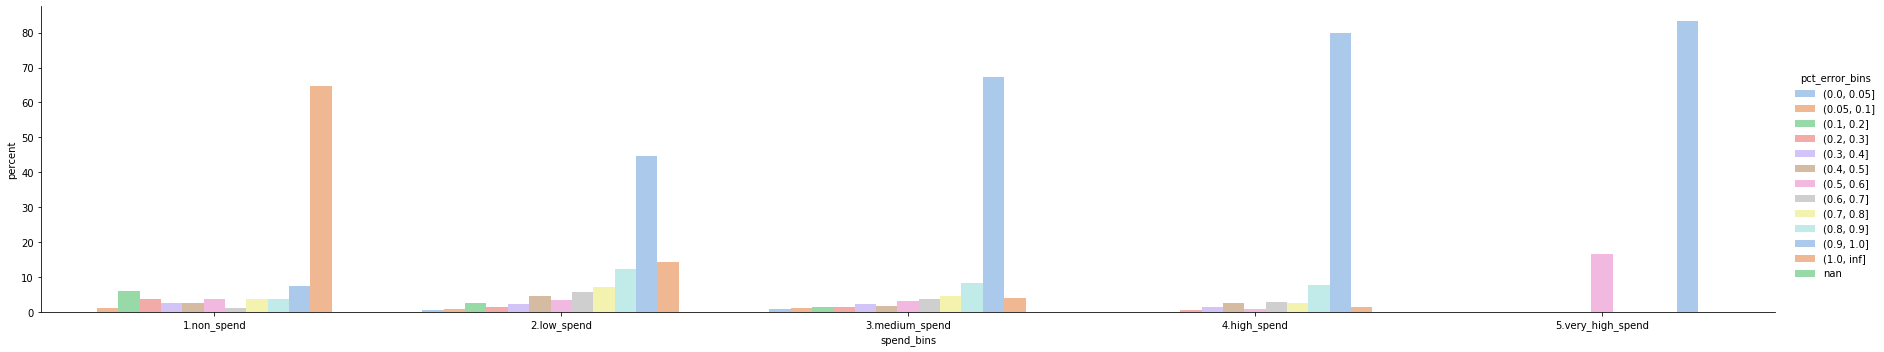

<seaborn.axisgrid.FacetGrid at 0x7fa78dab3e10>

In [0]:
(df_pd2[df_pd2['dv'] >0]
.groupby('spend_bins')['pct_error_bins']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='pct_error_bins',kind='bar', palette='pastel',hue_order=sorted(df_pd['pct_error_bins'].unique()),aspect=5))

Out[31]:

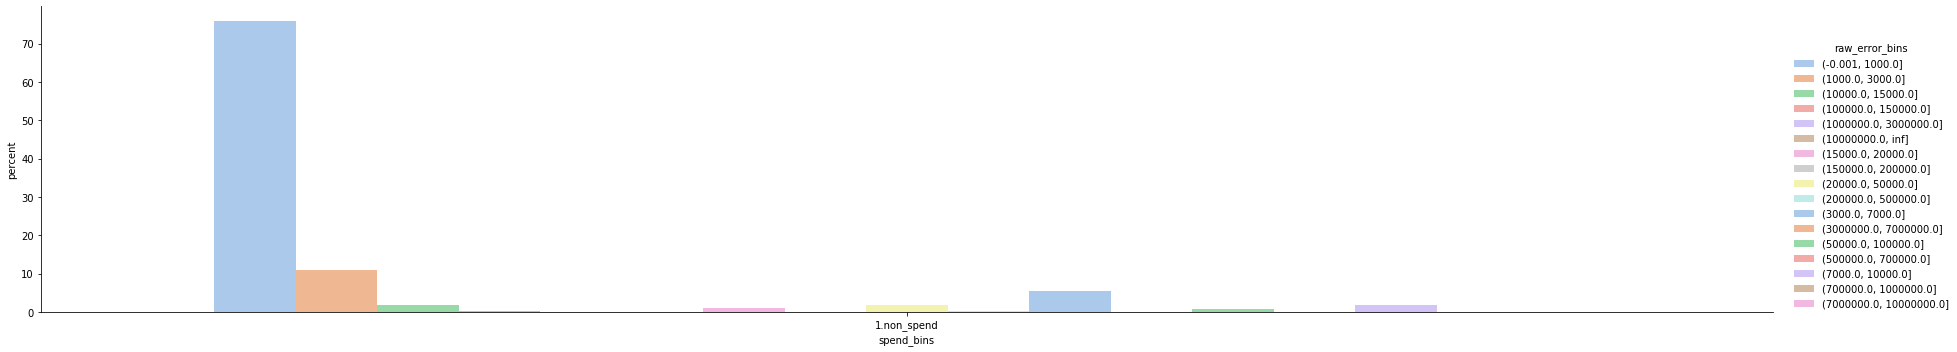

<seaborn.axisgrid.FacetGrid at 0x7fa5d1172250>

In [0]:
(df_pd2[df_pd2['dv'] <= 1000]
.groupby('spend_bins')['raw_error_bins']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='raw_error_bins',kind='bar', palette='pastel',hue_order=sorted(df_pd['raw_error_bins'].unique()),aspect=5))


Out[32]:

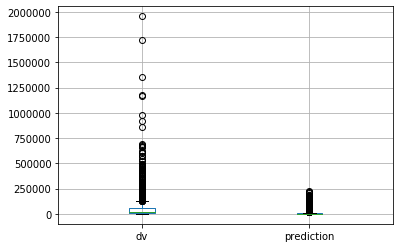

<matplotlib.axes._subplots.AxesSubplot at 0x7fa5d08988d0>

In [0]:
#box-plot
df2 = df_pd2[df_pd2['dv']>0]
df2 = df2[df2['prediction']<250000]
df2.boxplot(column=['dv','prediction']) 

Out[33]:

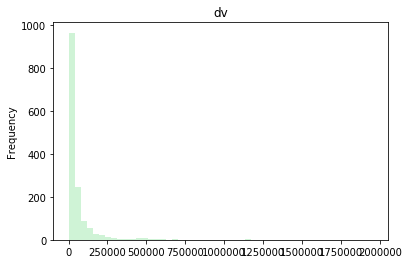

<matplotlib.axes._subplots.AxesSubplot at 0x7fa5d056e150>

In [0]:
df2['dv'].plot.hist(title='dv',color=['#A0E8AF'], alpha=0.5, bins=50)

### Assess Rankings

In [0]:
## Compare deciles

group_list = ['spend_deciles','predict_spend_deciles']
display(df_pd.groupby(group_list).agg({'account_id':'count',dv:['mean','median'],'prediction':['mean','median']}).reset_index())

('spend_deciles', '') ('predict_spend_deciles', '') ('account_id', 'count') ('dv', 'mean') ('dv', 'median') ('prediction', 'mean') ('prediction', 'median') 7 1 2755 238221.34474410224 161950.73 106918.07522323076 70296.65 7 2 794 178595.24474811085 116335.63 9231.990352644849 8887.985 7 3 358 162417.09153631295 110376.925 2783.3149441340775 2708.585 7 4 207 147360.09700483098 102223.2 1072.7047826086955 1048.42 7 5 145 150015.88944827588 104431.83 474.94648275862073 467.03 7 6 109 152338.7763302753 108904.65 233.00715596330272 222.16 7 7 64 158864.09718749998 103286.185 122.46218750000003 120.94 7 8 58 140607.2932758621 103706.82500000001 59.690689655172434 56.605000000000004 7 9 31 180515.95741935485 121513.0 35.65354838709678 37.87 7 10 41 183646.4168292683 104182.79 10.879756097560977 9.57 8 1 1599 35087.52808005002 33192.38 61157.04947467167 40045.28 8 2 1001 33098.906813186804 31031.2 8968.520799200802 8300.9 8 3 604 31562.66701986755 28785.39 2799.768443708611 2741.555 8 4 412 31205.280800970868 28466.46 1075.6342475728145 1081.23 8 5 283 32317.56173144874 29927.0 465.0996466431098 455.41 8 6 219 31196.975753424664 27774.72 238.1576712328766 241.12 8 7 157 30846.993694267527 27221.84 119.13968152866245 120.25 8 8 116 33747.9346551724 32312.730000000003 66.28293103448276 69.31 8 9 61 31526.6462295082 29140.04 34.164098360655714 35.6 8 10 110 31398.877090909085 27616.135000000002 16.117727272727272 18.25 9 1 886 10452.39065462754 10259.95 53436.96886004514 33876.28 9 2 928 9953.171756465526 9582.279999999999 8672.064342672413 8241.625 9 3 747 9587.494123159304 9100.08 2736.165957161981 2629.82 9 4 561 9393.513957219238 8804.0 1035.7402317290546 1008.35 9 5 427 9533.878735363 8719.54 455.30283372365284 443.58 9 6 338 9044.798372781072 8047.325000000001 233.80375739644975 232.745 9 7 264 9144.906060606058 8275.97 121.18106060606067 120.24000000000001 9 8 184 8893.941141304349 8285.470000000001 64.93347826086958 65.91499999999999 9 9 71 9271.08281690141 8383.32 34.46450704225349 35.32 9 10 155 8922.847096774196 8211.84 17.123290322580633 18.69 10 1 3884 225.77777548918624 0.0 46636.587837281084 30200.945 10 2 6400 202.84508593750007 0.0 8255.272695312484 7473.585 10 3 7414 170.8106177502022 0.0 2665.7206663069996 2542.05 10 4 7943 150.25567040161158 0.0 1023.4301661840583 985.83 10 5 8227 140.46931323690285 0.0 453.4530156800783 438.19 10 6 8497 100.08847122513825 0.0 232.67961751206286 232.05 10 7 8639 79.90707373538608 0.0 118.38623799050457 115.51 10 8 8436 53.57800142247513 0.0 61.62635609293603 61.09 10 9 7665 43.62338943248532 0.0 35.02355642530688 37.87 10 10 10442 42.14507278299178 0.0 17.42421375215473 18.28

In [0]:
#Average distance btwn actual rank & predict rank 
avg_abs_rank_dist = (df_pd.groupby(['spend_bins'])['abs_rank_dist'].mean())
median_abs_rank_dist = df_pd.groupby(['spend_bins'])['abs_rank_dist'].median()


pd.concat([avg_abs_rank_dist.rename('avg_abs_rank_dist'), median_abs_rank_dist.rename('median_abs_rank_dist')], axis=1)

Out[39]:

avg_abs_rank_dist 
 median_abs_rank_dist 
 
 
 spend_bins 
 
 
 
 
 
 
 1.non_spend 
 21385.199106 
 20472.00 
 
 
 2.low_spend 
 23003.218001 
 16487.75 
 
 
 3.medium_spend 
 16642.131451 
 8101.00 
 
 
 4.high_spend 
 10050.080838 
 3234.00

In [0]:
1. show distribution
2. show limitations-> 80% 0s, only engagement and minitigo static features (mintigo is same for both training and scoring)
3. 3 types of models tested 
4. show mae on square root, show lift using r2
5. compare with glm
6. show boxplot- that it underpredicts
7. show the outlier graph ~ 1400 accounts
8. show the % error graph

In [0]:
%sql
select mean(abs(dv - prediction)) as avg_error
from scored_dataset2
--where dv>0

avg_error 2780.361512148689

In [0]:
%sql
select mean(abs(dv - prediction)) as avg_error
from scored_dataset2
where dv < 1000000 and dv > 0 

avg_error 28382.07676190477

In [0]:
%sql
select mean(abs(dv - prediction)) as avg_error
from scored_dataset2
where dv=0 

avg_error 2223.1457886344792

In [0]:
%sql
select count(*)
from scored_dataset2 where dv>0

count(1) 1368

In [0]:
%sql
drop table scored_land_customers

In [0]:
%sql
create table scored_land_customers2 as
(select * from scored_dataset2)

In [0]:
%sql
select  total_mktg_success_dates,days_since_last_eng, number_of_employees, count_engagements, num_leads, security_engagements_ratio,dv, prediction, abs_residual,err_is_X_times_spend from scored_dataset2 where spend_bins='3.medium_spend' and err_is_X_times_spend>0.5

total_mktg_success_dates days_since_last_eng number_of_employees count_engagements num_leads security_engagements_ratio dv prediction abs_residual err_is_X_times_spend 0 2912 1700 0 0 0.0 39467.25 617.12 38850.13 0.9843637446237069 0 308 2 1 1 0.0 67380.7 0.06 67380.64 0.9999991095373008 20 281 14 20 3 0.65 10337.33 431.06 9906.27 0.95830064436368 1 874 477 1 1 1.0 29758.28 473.91 29284.37 0.9840746844239654 0 2912 20 0 0 0.0 23730.16 29.83 23700.329999999998 0.9987429499000428 1 985 700 1 1 0.0 24554.99 246.42 24308.570000000003 0.9899645652472268 0 2912 16 0 0 0.0 46304.62 129.46 46175.16 0.9972041666684663 0 2912 0 0 0 0.0 15530.28 4304.3 11225.98 0.7228446621696453 3 201 2647 4 4 0.0 63055.66 1434.29 61621.37 0.9772535883376686 13 312 188 13 1 0.538462 31319.24 14691.13 16628.11 0.530923164163626 15 20 121 18 13 0.266667 24503.12 77331.91 52828.79000000001 2.156002582528266 2 404 1188 2 2 0.5 10445.06 360.76 10084.3 0.9654611845216782 3 279 1185 4 2 0.0 14504.4 2217.83 12286.57 0.8470926063815118 5 2 0 12 9 0.8 56293.55 2463.58 53829.97 0.9562369045832071 3 23 20 4 4 0.333333 39970.8 4423.51 35547.29 0.889331461967236 2 527 250 2 1 0.0 16312.56 187.99 16124.57 0.9884757512003021 9 46 20 9 5 0.44444399999999995 10523.76 3391.49 7132.27 0.6777302028932625 9 180 575 9 7 0.0 15339.95 2295.21 13044.740000000002 0.8503769569001204 9 180 575 9 7 0.0 15339.95 2295.21 13044.740000000002 0.8503769569001204 7 184 375 7 4 0.28571399999999997 43733.49 10302.83 33430.659999999996 0.7644178408812102 0 12 1249 24 1 0.0 24270.78 20.42 24250.36 0.9991586590954227 0 2912 800 0 0 0.0 30086.01 106.41 29979.6 0.9964631401771122 0 1006 0 1 1 0.0 73029.34 216.79 72812.55 0.9970314670788482 4 15 1664 3 3 0.25 37260.24 149.35 37110.89 0.9959917059042025 3 1300 50 4 4 0.0 22683.99 298.23 22385.760000000002 0.986852842026469 0 2912 0 0 0 0.0 18164.83 250.98 17913.850000000002 0.9861831902638231 0 2912 1127 0 0 0.0 25578.02 158.1 25419.920000000002 0.9938189117062228 24 161 2403 23 12 0.708333 52214.56 23828.09 28386.469999999998 0.5436504683751046 0 2912 50 0 0 0.0 23280.0 167.24 23112.76 0.992816151202749 0 2912 2951 0 0 0.0 59099.33 376.8 58722.53 0.9936242932026471 2 418 1131 2 2 1.0 23687.53 1469.51 22218.02 0.9379627170920734 1 580 10890 1 1 1.0 35102.26 6791.08 28311.18 0.8065343940817485 9 35 3229 9 6 0.333333 43225.2 7400.03 35825.17 0.8288028742492806 2 462 585 2 1 1.0 22060.4 254.25 21806.15 0.9884748236659353 22 78 2606 26 16 0.090909 13671.83 4196.4 9475.43 0.6930623040222121 23 184 48 23 16 0.21739099999999997 74464.36 4710.29 69754.07 0.9367443700583743 8 71 35 8 6 0.75 35883.87 6240.44 29643.430000000004 0.8260934509014775 5 371 1000 6 2 0.4 27318.0 1809.75 25508.25 0.9337524708983088 10 12 0 16 9 0.6 43575.98 12827.27 30748.710000000003 0.7056343884865011 0 2912 0 0 0 0.0 14338.92 179.88 14159.04 0.9874551221430903 9 197 1125 9 8 0.777778 23829.8 11302.91 12526.89 0.525681709456227 9 308 0 9 5 0.777778 25393.48 7416.41 17977.07 0.7079403846971742 10 84 600 27 16 0.8 58298.97 2120.56 56178.41 0.9636261155214235 0 2912 2054 0 0 0.0 27305.5 449.5 26856.0 0.9835381150317701 21 12 100 21 15 0.14285699999999998 53345.47 2022.69 51322.78 0.9620831909438607 4 1262 600 6 2 0.0 64491.28 127.41 64363.869999999995 0.9980243840717691 2 1843 0 2 1 0.5 17627.02 710.41 16916.61 0.9596976686927229 0 2912 700 0 0 0.0 14899.27 289.53 14609.74 0.9805675043139697 0 2912 3500 0 0 0.0 24472.4 276.58 24195.82 0.9886982886843955 4 1371 0 4 4 1.0 11291.1 1716.81 9574.29 0.8479501554321546 3 54 2051 3 2 0.666667 48660.82 6696.74 41964.08 0.8623792200789054 0 2912 1 0 0 0.0 16080.72 27.99 16052.73 0.9982594062952406 0 2912 116 0 0 0.0 22693.96 278.37 22415.59 0.9877337406076331 0 2912 1500 0 0 0.0 26358.82 456.77 25902.05 0.9826710755640806 0 2912 0 0 0 0.0 34310.28 33.73 34276.549999999996 0.9990169127153726 2 657 75 2 2 1.0 13154.0 786.08 12367.92 0.940240231108408 11 12 15 11 4 0.272727 51766.87 16767.26 34999.61 0.6761005639321056 4 795 200 4 3 0.0 10178.2 4

In [0]:
%sql
select * from scored_land

is_citrix_xenapp_user days_since_last_eng is_dell_partner is_thawte_ssl_user is_profitability_hiring application_delivery_network_f5 is_wordpress_user is_ad_blocker_channel_intelligence_scraper digital_engagement_per_person database_db2 last_3years_piacv_amount has_network_attached_storage_related_hiring is_ad_blocker_pingdom_scraper is_dropbox_user it_citrix_netscaler is_netsuite_user days_since_last_security_success service_provider_iaas is_bigcommerce_user has_bigdata_solution has_hbase_job_posts is_exadata_user security_check_point is_emc_user is_symantec_partner last_3years_std_booking_amount is_microsoft_partner has_accumulo_job_posts security_fortinet is_apache_tomcat_user is_ad_blocker_appdynamics_scraper is_apache_camel_user last_3years_avg_quantity_amount is_using_specific_dynatrace_products engagements_per_lead_ratio last_3months_mktg_success_dates is_qemu_user is_lotus_notes_user os_debian is_twitter_api_user has_ssl_ceritifcation is_ad_blocker_opentracker_scraper is_partner is_sybase_user is_data_warehouse_user digital_engagements_count last_3years_booking_amount is_cisco_partner is_veritas_enterprise_vault_user is_mysql_user has_impala_job_posts is_windows_server_2003_user is_ad_blocker_weborama_scraper offline_engagements_ratio online_engagements_ratio is_sage_user avg_time_between_successes is_silverlight_user is_nosql_db_related_hiring os_centos is_social_media_measurement_related_hiring high_rank_leads_ratio has_hdfs_job_posts is_geotrust_user last_3months_web_visits_per_person is_windows_server_2012_user security_engagements_ratio is_zen_cart_user is_ad_blocker_flxone_scraper indication_has_netapp_related_job_posts fortune_1000 is_hyperv_user security_palo_alto_networks last_3years_std_quantity_amount is_box_user dns_amazon_route_s3 is_veritas_user is_joomla_user is_hadoop_user is_cyber_attack_related_hiring mid_rank_leads_ratio web_technology_ajax fortune_1000_company days_since_last_offline_success web_visits_per_person has_postgresql_job_posts software_suite_oracle is_drupal_user is_commvault_user dns_volusion is_ad_blocker_coradiant_scraper last_3years_line_item_count software_suite_salesforce peer_to_peer_context_in_text security_sonicwall is_infor_user has_ecommerce_platform icloud is_ad_blocker_sift_science_scraper last_3years_avg_booking_amount last_3years_quantity_amount database_positions dns_cloudflare is_vmware_partner is_hp_partner is_netezza_user num_person is_emc_data_domain_user is_digicert_ssl_user has_api_gateway_related_hiring is_juniper_user is_emc_networker_user account_id last_3years_std_line_item_count is_windows_server_2008_user last_3years_opps_closed web_server_phusion_passenger is_rackspace_dns_services_user is_deltek_costpoint_user has_kafka_job_posts has_live_chat cloud_security technical_support_positions is_magento_user is_kvm_user is_dot_net_user raw_num_security_leads is_ad_blocker_peerius_scraper is_emc_avamar_user has_cloudera_solution num_leads is_field_workforce has_education_titles number_of_employees is_using_specific_gomez_products total_mktg_success_dates dns_neustar_ultradns target_account is_zaibatsu is_call_center_operator is_ad_blocker_lotame_scraper dns_dns_made_easy count_engagements has_redshift_job_posts web_visits is_cognos_user is_data_center_related_hiring last_3months_web_visits last_3years_avg_line_item_count is_ad_blocker_open_web_analytics_scraper os_red_hat is_register_com_user os_ubuntu is_kaseya_related_hiring is_jde_enterpriseone_user software_suite_sap is_lxc_user is_veeam_user is_informatica_user last_3years_avg_piacv_amount is_mulesoft_user data_storage_positions is_siem_software_related_hiring is_flickr_api_user is_microstrategy_user tech_leads_ratio is_html_hiring is_paas_related_hiring cloud_computing_microsoft_azure is_inc_5000_last_3_years has_pig_job_posts last_3months_digital_engagements_count is_veritas_backup_exec_user is_isilon_user last_3months_mktg_success_ratio service_provider_cloud_services security_breach_victim last_3months_digit

In [0]:
df = spark.sql('select * from scored_land').toPandas()

In [0]:
def round_nearest(x,cutoff=100000):
  '''Round to 0 or nearest 10K or 100K based on cutoff'''
  def round_nearest_multiple(number,multiple):
    '''Returns a float rounded to the nearest multiple'''
    return round(float(number)/multiple)*multiple
  def round_up_nearest_multiple(number,multiple):
    '''Returns a float rounded up to nearest multiple'''
    return math.ceil(float(number)/multiple)*multiple
  
  if x < 1000:
    return 0
  elif x < cutoff:
    if x <= 5000:
      return round_up_nearest_multiple(x,1000) # round up to nearest 10K if between 0-5K
    return round_nearest_multiple(x,10000) # round to nearest 10K
  elif x >= cutoff:
    return round_nearest_multiple(x,10000) # round to nearest 10K    

In [0]:
## Round $$$ to 0, nearest 10K, or nearest 100K
df['rounded_spend'] = df['dv'].apply(round_nearest)
df['rounded_prediction'] = df['prediction'].apply(round_nearest)
df['rounded_abs_residual'] = abs(df['rounded_spend'] - df['rounded_prediction'])
df['rounded_residual'] = df['rounded_spend'] - df['rounded_prediction']

In [0]:
#Covert to spark
scored_spark_df = spark.createDataFrame(df)

In [0]:
scored_spark_df.createOrReplaceTempView("scored_land_rounded")

In [0]:
df.head()

Out[23]:

is_citrix_xenapp_user 
 days_since_last_eng 
 is_dell_partner 
 is_thawte_ssl_user 
 is_profitability_hiring 
 application_delivery_network_f5 
 is_wordpress_user 
 is_ad_blocker_channel_intelligence_scraper 
 digital_engagement_per_person 
 database_db2 
 last_3years_piacv_amount 
 has_network_attached_storage_related_hiring 
 is_ad_blocker_pingdom_scraper 
 is_dropbox_user 
 it_citrix_netscaler 
 is_netsuite_user 
 days_since_last_security_success 
 service_provider_iaas 
 is_bigcommerce_user 
 has_bigdata_solution 
 has_hbase_job_posts 
 is_exadata_user 
 security_check_point 
 is_emc_user 
 is_symantec_partner 
 last_3years_std_booking_amount 
 is_microsoft_partner 
 has_accumulo_job_posts 
 security_fortinet 
 is_apache_tomcat_user 
 is_ad_blocker_appdynamics_scraper 
 is_apache_camel_user 
 last_3years_avg_quantity_amount 
 is_using_specific_dynatrace_products 
 engagements_per_lead_ratio 
 last_3months_mktg_success_dates 
 is_qemu_user 
 is_lotus_notes_user 
 os_debian 
 is_twitter_api_user 
 ... 
 is_teradata_user 
 dns_godaddy 
 days_since_last_online_success 
 has_hive_job_posts 
 is_websphere_ecommerce_user 
 application_performance_management_new_relic 
 is_django_user 
 is_prestashop_user 
 is_veritas_netbackup_user 
 dns_dyn 
 is_disaster_recovery_related_hiring 
 is_vertica_user 
 is_solaris_containers_user 
 netops_leads_ratio 
 is_ad_blocker_maxmind_scraper 
 has_spark_job_posts 
 is_sfdc_crm_user 
 dv 
 sr_prediction 
 prediction 
 calendar_date 
 residual 
 abs_residual 
 spend_rank 
 predict_spend_rank 
 abs_rank_dist 
 spend_deciles 
 predict_spend_deciles 
 over_under_predict 
 err_is_X_times_spend 
 pct_error_bins 
 raw_error_bins 
 spend_bin_intervals 
 spend_bins 
 predict_spend_bin_intervals 
 predict_spend_bins 
 rounded_spend 
 rounded_prediction 
 rounded_abs_residual 
 rounded_residual 
 
 
 
 
 0 
 0 
 2912 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 2909 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.00 
 0 
 0 
 0 
 0.0 
 5.461613 
 29.83 
 2020-01-01 
 -29.83 
 29.83 
 54422.5 
 79206.5 
 24784.0 
 10 
 9 
 1 
 NaN 
 nan 
 (-0.001, 1000.0] 
 (-0.001, 1000.0] 
 1.non_spend 
 (-0.001, 1000.0] 
 1.non_spend 
 0 
 0 
 0 
 0 
 
 
 1 
 0 
 419 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 1 
 813 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 1.8 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 419 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0.00 
 0 
 1 
 0 
 0.0 
 88.929237 
 7908.41 
 2020-01-01 
 -7908.41 
 7908.41 
 54422.5 
 13560.0 
 40862.5 
 10 
 2 
 1 
 NaN 
 nan 
 (7000.0, 10000.0] 
 (-0.001, 1000.0] 
 1.non_spend 
 (1000.0, 10000.0] 
 2.low_spend 
 0 
 10000 
 10000 
 -10000 
 
 
 2 
 1 
 142 
 0 
 0 
 0 
 0 
 1 
 0 
 0.0 
 0 
 0.0 
 0 
 0 
 0 
 1 
 0 
 813 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 1.0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 1 
 142 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0.25 
 0 
 0 
 0 
 0.0 
 57.934242 
 3356.38 
 2020-01-01 
 -3356.38 
 3356.38 
 54422.5 
 20435.0 
 33987.5 
 10 
 3 
 1 
 NaN 
 nan 
 (3000.0, 7000.0] 
 (-0.001, 1000.0] 
 1.non_spend 
 (1000.0, 10000.0] 
 2.low_spend 
 0 
 4000 
 4000 
 -4000 
 
 
 3 
 0 
 2912 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 2909 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.00 
 0 
 0 
 0 
 0.0 
 15.842375 
 250.98 
 2020-01-01 
 -250.98 
 250.98 
 54422.5 
 48904.5 
 5518.0 
 10 
 6 
 1 
 NaN 
 nan 
 (-0.001, 1000.0] 
 (-0.001, 1000.0] 
 1.non_spend 
 (-0.001, 1000.0] 
 1.non_spend 
 0 
 0 
 0 
 0 
 
 
 4 
 0 
 2912 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 813 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0.0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 2909 
 0 
 0 
 

In [0]:
%sql
select a.calendar_date, a.account_id,b.account_org_name, a.rounded_spend as rounded_actual_spend, a.rounded_prediction as rounded_predicted_spend, a.rounded_abs_residual as rounded_abs_error
from scored_land_rounded a left join view_account b on a.account_id=b.ID

calendar_date account_id account_org_name rounded_actual_spend rounded_predicted_spend rounded_abs_error 2020-01-01 00150000019nhj4AAA Mandiri International Remittance Sdn Bhd 0 0 0 2020-01-01 0015000000SNUTxAAP CITY DEVELOPMENTS LIMITED 0 10000 10000 2020-01-01 0015000000Fb4AnAAJ Hope Network 0 4000 4000 2020-01-01 0015000001HcaaaAAB Karina Indústria e Comércio de Plásticos Ltda 0 0 0 2020-01-01 0015000000PGYIaAAP Employee Retrain Board 0 0 0 2020-01-01 0015000000MHNVWAA5 PZ CUSSONS PLC 0 0 0 2020-01-01 00100000001g1dVAAQ Enghouse Systems Limited 0 0 0 2020-01-01 0015000000SLjE5AAL Hammel, Green and Abrahamson, Inc. 0 0 0 2020-01-01 0015000000Ziny6AAB State Administration of Taxation 0 0 0 2020-01-01 0011T00002Kg4ObQAJ Intecsus 0 0 0 2020-01-01 001500000101dUiAAI CENTURY COMMERCIAL BANK LIMITED 0 0 0 2020-01-01 0015000000mRnADAA0 Xiamen Airlines 0 90000 90000 2020-01-01 00130000006l2Q3AAI Deere & Company 0 0 0 2020-01-01 0015000000EWPciAAH Shanghai Information Center 0 0 0 2020-01-01 00150000013XF45AAG SERVEI CATALA DE LA SALUT CCT 0 2000 2000 2020-01-01 0015000000dFA4XAAW Jiangsu Provincial Department of Education 0 0 0 2020-01-01 0015000001WwnL5AAJ Promotora y Operadora de Infraestructura, S.A.B. de C.V. 0 0 0 2020-01-01 0015000000aF8WlAAK Middle East and Africa Bank 0 0 0 2020-01-01 00150000016asL0AAI Element Capital Management LLC 0 0 0 2020-01-01 0015000000qUchGAAS Slagelse Kommune 0 2000 2000 2020-01-01 00150000019ogypAAA Hino Motors 0 0 0 2020-01-01 0015000000aFEaOAAW Havas North America, Inc. 0 5000 5000 2020-01-01 0015000001VR0rnAAD SERCOTEC 0 0 0 2020-01-01 0015000000oVWx8AAG NAGOYA INSTITUTE OF TECHNOLOGY 0 10000 10000 2020-01-01 0015000000Q8EnwAAF Hoosier Energy Rural Electric Cooperative Inc. 0 0 0 2020-01-01 00100000000uk4oAAA Oregon University System 0 20000 20000 2020-01-01 0015000000oCYnpAAG P2 Acquisition, LLC 0 0 0 2020-01-01 00130000003lgSbAAI Subject Wills 0 0 0 2020-01-01 0015000001RLgFCAA1 Openrich Technology 0 0 0 2020-01-01 001000000014WsmAAE Trimble Navigation Limited Inc 0 0 0 2020-01-01 0015000001G3q1RAAR Mitsubishi Motors 0 0 0 2020-01-01 0015000000OXjQqAAL Rikshospitalet 0 0 0 2020-01-01 0015000000pUv2PAAS Quantum Systems Integrators 0 0 0 2020-01-01 0011T00002JacloQAB Câmara Municipal de Estarreja 0 0 0 2020-01-01 0013000000CQrnrAAD Deutsche Telekom 0 10000 10000 2020-01-01 00100000000un0jAAA Verizon Communications Inc. 0 2000 2000 2020-01-01 0015000000QRTmkAAH Independent Field Services, Inc. 0 0 0 2020-01-01 0015000000go7DBAAY Methacton School District 0 0 0 2020-01-01 0015000000iXuFcAAK UBS AG 0 2000 2000 2020-01-01 00150000019pRuzAAE BANK OF ABYSSINIA 0 10000 10000 2020-01-01 0015000000nAG1BAAW PT. LANGIT ESA OKTAGON 0 0 0 2020-01-01 00100000000ulVdAAI Madison Internet Corporation 0 0 0 2020-01-01 0015000000aE6vgAAC Walmart 0 0 0 2020-01-01 0015000000RjKtZAAV IPH LIMITED 0 0 0 2020-01-01 0015000000RjKtZAAV IPH LIMITED 0 0 0 2020-01-01 0015000000ccdi9AAA Telmex International 0 20000 20000 2020-01-01 0015000001TSBG8AAP Pacific Hydro Chile 0 2000 2000 2020-01-01 0015000000UmgswAAB HPE 0 20000 20000 2020-01-01 00150000016X0cpAAC Ministry of Education 0 0 0 2020-01-01 0015000000gnXoRAAU European Neuroscience Institute (ENI-G) 0 0 0 2020-01-01 0013000000DMiapAAD Amp'd Mobile, Inc. 0 0 0 2020-01-01 0015000000bxSOBAA2 Jiang xi JINGDEZHEN POWER PLANT (江西景德镇发电厂) 0 0 0 2020-01-01 00150000017KQrpAAG KUWAZAWA TRADING CO., LTD. 0 0 0 2020-01-01 0015000000bPTpDAAW Dsr, Inc. 0 0 0 2020-01-01 0015000000SdOZQAA3 Ericsson 0 0 0 2020-01-01 0015000000OVXTqAAP Gp Electronics (Hk) Limited 0 20000 20000 2020-01-01 0015000000fkT7EAAU Eternal Sparkle Inforcom Taiwan 0 0 0 2020-01-01 0013000000BY8v7AAD OHRA Groep N.V. 0 0 0 2020-01-01 0015000000Xr3HSAAZ NETSOL TECHNOLOGIES LIMITED 0 10000 10000 2020-01-01 00130000004PgS6AAK Allen, Williams & Hughes Company 0 0 0 2020-01-01 0013000000AJBjlAAH Virtual-Agent Services 0 0 0 2020-01-01 001000000028dKhAAI Eruces, Inc 0 0 0 2020-01-01 0015000000YMMDaAAP FacilicorpNB Ltd/Ltée

In [0]:
%sql
select avg(rounded_abs_residual) from scored_land_rounded where rounded_spend=0

avg(rounded_abs_residual) 2262.3809675467373